INFO:root:Onnx model /home/robby/.MyOCR/models/dbnet++.onnx loaded to cuda:0


执行时间: 0.008891105651855469 秒


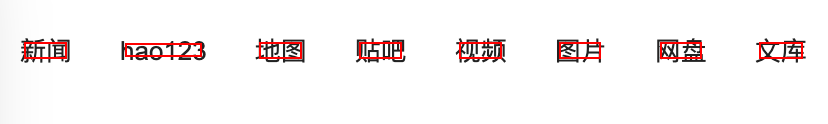

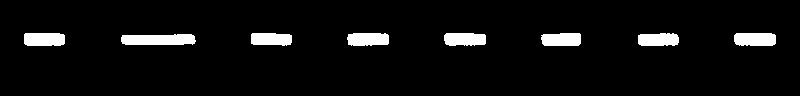

In [24]:
import time

import torch
from PIL import Image,ImageDraw
from myocr.config import MODEL_PATH
from myocr.models.model import ModelZoo
from myocr.predictors.text_detection_predictor import TextDetectionParamConverter

model = ModelZoo.load_model("onnx", MODEL_PATH+"dbnet++.onnx", "cuda:0" if torch.cuda.is_available() else "cpu")
p = model.predictor(TextDetectionParamConverter(model.device))
orig_image = Image.open("images/test_ocr.png").convert("RGB")
start_time = time.time()
detected = p.predict(orig_image)
end_time = time.time()  
print(f"执行时间: {end_time - start_time} 秒")

draw = ImageDraw.Draw(orig_image)
for box in detected.bounding_boxes: # type: ignore
    draw.polygon(
        [(box.left, box.bottom), (box.left, box.top), (box.right, box.top), (box.right, box.bottom)],
        outline="red",
        width=2,
    )

display(orig_image)

display(Image.fromarray(detected.binary_map))